In [3]:
import numpy as np 
import itertools
import matplotlib.pyplot as plt
import pickle
import sys


In [4]:

#FUNCTION
def partition_N(n):
    '''do the partition of a complete graph'''
    indexs = range(n)
    pairs_all = []

    swap_even = [i + pow(-1, i) for i in range(n)]

    swap_odd = [0]
    swap_odd.extend([i + pow(-1, i+1) for i in range(1,n-1)])
    swap_odd.append(n-1)

    pairs_even = [(i, i+1) for i in range(0, n, 2)]
    indexs = np.array(indexs)[swap_even]   ### indexs after swap even
    #     print('\nindexs after swap {}: {}'.format(0, indexs))
    pairs_all.append(pairs_even)
    for i in range(1, n):
        if (i%2)==1:
            pair_odd = [(indexs[i], indexs[i+1]) for i in range(1, n-1, 2)]
            pairs_all.append(pair_odd)
            indexs = np.array(indexs)[swap_odd]   ### indexs after swap even
    #             print('\nindexs after swap {}: {}'.format(i, indexs))

        elif (i%2)==0:
            pair_even = [(indexs[i], indexs[i+1]) for i in range(0, n-1, 2)]
            pairs_all.append(pair_even)
            indexs = np.array(indexs)[swap_even]   ### indexs after swap even
    #             print('\nindexs after swap {}: {}'.format(i, indexs))

    return pairs_all



In [5]:
num_variables_list = [str(num).zfill(3) for num in range(6,16, 2)]

N_ins = 100 ###100 50 number of random instances

ansatz_type = 'structure_like_qubo_YZ_2' 

layer = 1

shots = None

alpha = 0.01

tau =1.0

dir_0 = './data_sorting' + '/ansatz_type_{}/shots_{}'\
                        .format(ansatz_type,  shots)

ITE_all = []
solution_dict_all = []
iteoverlap_dict_all = []

for num_variables in num_variables_list:

    ITE_list = []

    # Initialize the dictionary using dictionary comprehension
    solution_dict = {
    'old' : {f'Sort_{Abs}_{invert}': [] for Abs in [True, False] for invert in [True, False]},
    'lightcone' :  {f'Sort_{Abs}_{invert}': [] for Abs in [True, False] for invert in [True, False]} }
    iteoverlap_dict = {
    'old' : {f'Sort_{Abs}_{invert}': [] for Abs in [True, False] for invert in [True, False]},
    'lightcone' :  {f'Sort_{Abs}_{invert}': [] for Abs in [True, False] for invert in [True, False]} }

    solution_dict['old']['Random'] = []
    solution_dict['lightcone']['Random'] = []
    iteoverlap_dict['old']['Random'] = []
    iteoverlap_dict['lightcone']['Random'] = []

    n_qubits = int(num_variables)

    pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
    num_pairs = len(pairs_all)
    num_params = (n_qubits + 2*num_pairs) * layer

    for initialization in ['warm_start_measure']:   #'warm_start_measure_lightcone'

        print('initialization', initialization) 
        y = []

        dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}/initial_{}'\
                            .format(num_variables, num_params, layer, alpha, initialization)
        
        for r in range(N_ins):
                
            file_dir_name = dir_name + '/r_{}'\
                            .format(r)
            
            #ADD THE RANDOM OPTION
            if initialization ==  'warm_start_measure':
                file_path = file_dir_name + '/tau_{}_random.pkl'\
                                                    .format(tau)
                with open(file_path, 'rb') as f:
                    data = pickle.load(f)            
                fidelity = list(data['layers_exp_poss_dict']['l_1'].items())[0][1]
                solution_dict['old']['Random'].append(fidelity)
                ITE_list.append(list(data['exp_poss_dict_ite'].items())[0][1])
                overlap = data['ite_overlap']
                iteoverlap_dict['old']['Random'].append(overlap)

            elif initialization == 'warm_start_measure_lightcone':
                file_path_lightcone = file_dir_name + '/tau_{}_random.pkl'\
                                                    .format(tau)
                with open(file_path_lightcone, 'rb') as f:
                    data_lightcone = pickle.load(f)            
                fidelity = list(data_lightcone['exp_poss_dict'].items())[0][1]
                solution_dict['lightcone'][f'Sort_{Abs}_{invert}'].append(fidelity)
                overlap = data['ite_overlap']
                iteoverlap_dict['lightcone'][f'Sort_{Abs}_{invert}'].append(overlap)

            else:
                sys.stderr.write('something is wrong with initialization')
                sys.exit()

            #ADD ALL THE SORTING OPTIONS
            for Abs in [True, False]:
                for invert in [True, False]:

                    if initialization ==  'warm_start_measure':
                        file_path = file_dir_name + '/tau_{}_{}_{}.pkl'\
                                                    .format(tau, Abs, invert)
                        with open(file_path, 'rb') as f:
                            data = pickle.load(f)            
                        fidelity = list(data['layers_exp_poss_dict']['l_1'].items())[0][1]
                        solution_dict['old'][f'Sort_{Abs}_{invert}'].append(fidelity)
                        overlap = data['ite_overlap']
                        iteoverlap_dict['old'][f'Sort_{Abs}_{invert}'].append(overlap)

                    elif initialization == 'warm_start_measure_lightcone':
                        file_path_lightcone = file_dir_name + '/tau_{}_{}_{}.pkl'\
                                                            .format(tau, Abs, invert)
                        with open(file_path_lightcone, 'rb') as f:
                            # Load the content of the file using pickle.load()
                            data_lightcone = pickle.load(f)            
                        fidelity = list(data_lightcone['exp_poss_dict'].items())[0][1]
                        solution_dict['lightcone'][f'Sort_{Abs}_{invert}'].append(fidelity)
                        overlap = data['ite_overlap']
                        iteoverlap_dict['lightcone'][f'Sort_{Abs}_{invert}'].append(overlap)

                    else:
                        sys.stderr.write('something is wrong with initialization')
                        sys.exit()

    ITE_all.append(ITE_list)
    solution_dict_all.append(solution_dict)
    iteoverlap_dict_all.append(iteoverlap_dict)
                        


initialization warm_start_measure
initialization warm_start_measure
initialization warm_start_measure
initialization warm_start_measure
initialization warm_start_measure


In [6]:
print(len(ITE_all))
print(len(solution_dict_all))
print(len(iteoverlap_dict_all))

5
5
5


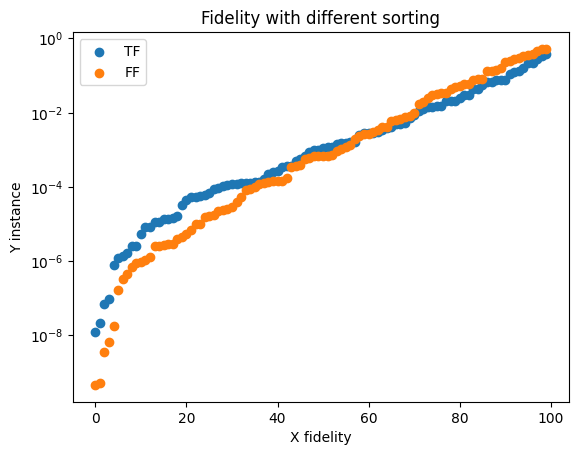

In [7]:
# Create the scatter plot
#plt.scatter(range(N_ins), sorted(ITE_list), label = 'ITE')
#plt.scatter(range(N_ins), sorted(solution_dict['old']['Random']), label = 'random')
#plt.scatter(range(N_ins), sorted(solution_dict['old']['Sort_True_True']), label = 'TT')
plt.scatter(range(N_ins), sorted(solution_dict['old']['Sort_True_False']), label = 'TF')
#plt.scatter(range(N_ins), sorted(solution_dict['old']['Sort_False_True']), label = 'FT')
plt.scatter(range(N_ins), sorted(solution_dict['old']['Sort_False_False']), label = 'FF')

# Add labels and title
plt.xlabel("X fidelity")
plt.ylabel("Y instance")
plt.title("Fidelity with different sorting")

plt.legend()
plt.yscale('log')
# Display the plot
plt.show()

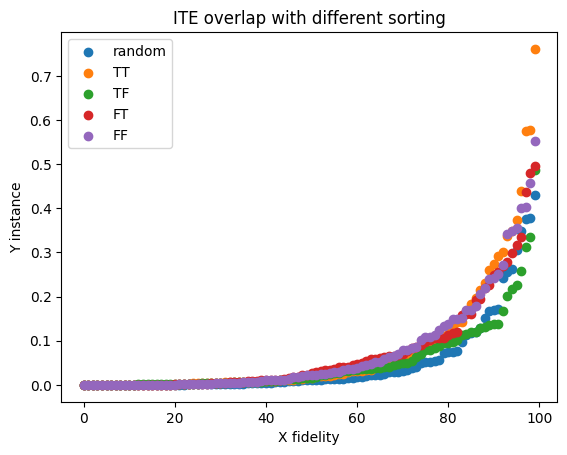

In [8]:
# Create the scatter plot
plt.scatter(range(N_ins), sorted(iteoverlap_dict['old']['Random']), label = 'random')
plt.scatter(range(N_ins), sorted(iteoverlap_dict['old']['Sort_True_True']), label = 'TT')
plt.scatter(range(N_ins), sorted(iteoverlap_dict['old']['Sort_True_False']), label = 'TF')
plt.scatter(range(N_ins), sorted(iteoverlap_dict['old']['Sort_False_True']), label = 'FT')
plt.scatter(range(N_ins), sorted(iteoverlap_dict['old']['Sort_False_False']), label = 'FF')

# Add labels and title
plt.xlabel("X fidelity")
plt.ylabel("Y instance")
plt.title("ITE overlap with different sorting")

plt.legend()
# Display the plot
plt.show()

[63 41  8 66 61 13  4 93 44 29 18 45 68 77 75 26 25 82 59 74 35 46 79 50
 70 22 86 36 55 38 47  5 83 90 64 97 43 60 88 12 56 76 51  3 17 67 80 27
  0 65 28 30 85 40 72 11 33 37 15 78  6 31 53 95 14 39  1 96 42 92 20 54
 32 48 34 16 10 91  7 87 81 49 84 57 98 21 23 73  9 62 19  2 99 71 52 24
 89 58 94 69]


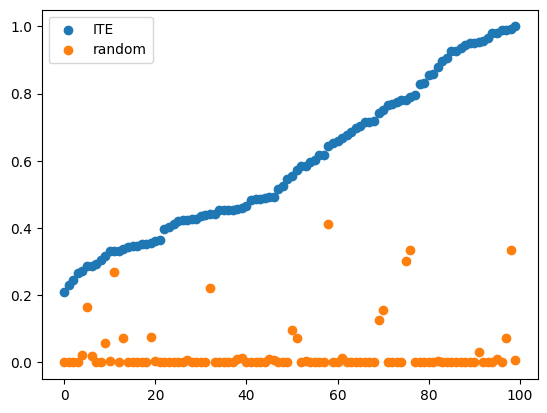

In [9]:
sorted_ind = np.argsort(ITE_list)
print(sorted_ind)
plt.scatter(range(N_ins), np.array(ITE_list)[sorted_ind], label = 'ITE')
plt.scatter(range(N_ins), np.array(solution_dict['old']['Random'])[sorted_ind], label = 'random')
plt.legend()


[47 79 73 86 75 85 41 52 43 27 11 48 81 64  1  5 70 60 42 44  9 39 87  8
  7 62 34 78 50 97 22 46 38 90 63 49 96 99 17 32 95 91 55 37 14 25 89 57
 26  0 82 59 68 93 56 76 23 19 98 51 65 72  3 21 53  6 33 71 54 66 40 35
 84 18 80 69 36 67 24 88 12 31  4 61  2 29 77 58 30 74 28 92 20 13 83 45
 16 10 94 15]


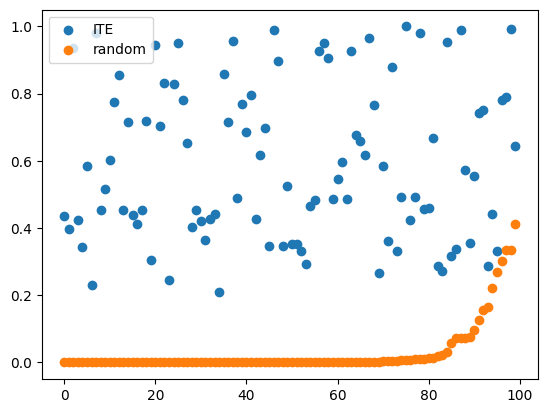

In [10]:
sorted_ind = np.argsort(solution_dict['old']['Random'])
print(sorted_ind)
plt.scatter(range(N_ins), np.array(ITE_list)[sorted_ind], label = 'ITE')
plt.scatter(range(N_ins), np.array(solution_dict['old']['Random'])[sorted_ind], label = 'random')
plt.legend()

[47 79 73 86 75 85 41 52 43 27 11 48 81 64  1  5 70 60 42 44  9 39 87  8
  7 62 34 78 50 97 22 46 38 90 63 49 96 99 17 32 95 91 55 37 14 25 89 57
 26  0 82 59 68 93 56 76 23 19 98 51 65 72  3 21 53  6 33 71 54 66 40 35
 84 18 80 69 36 67 24 88 12 31  4 61  2 29 77 58 30 74 28 92 20 13 83 45
 16 10 94 15]


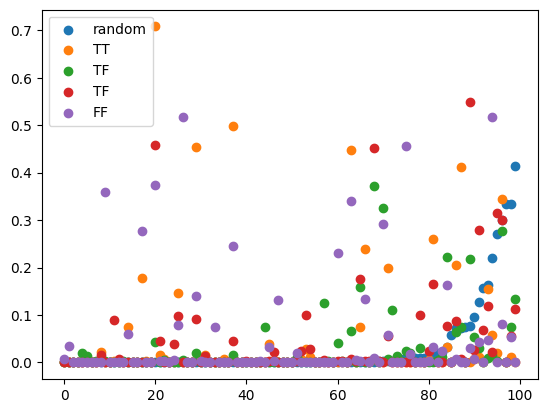

In [11]:
sorted_ind = np.argsort(solution_dict['old']['Random'])
print(sorted_ind)
# plt.scatter(range(N_ins), np.array(ITE_list)[sorted_ind], label = 'ITE')
plt.scatter(range(N_ins), np.array(solution_dict['old']['Random'])[sorted_ind], label = 'random')
plt.scatter(range(N_ins), np.array(solution_dict['old']['Sort_True_True'])[sorted_ind], label = 'TT')
plt.scatter(range(N_ins), np.array(solution_dict['old']['Sort_True_False'])[sorted_ind], label = 'TF')
plt.scatter(range(N_ins), np.array(solution_dict['old']['Sort_False_True'])[sorted_ind], label = 'TF')
plt.scatter(range(N_ins), np.array(solution_dict['old']['Sort_False_False'])[sorted_ind], label = 'FF')
plt.legend()


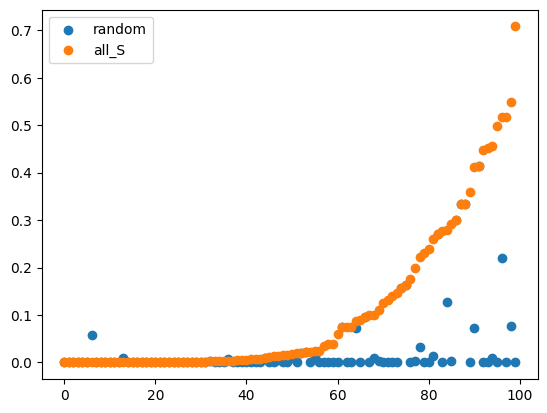

In [12]:
######################################################
#Try to sort adaptively using overlap with ITE - old style 

keys = [] 
for i in range(N_ins):
    current_value = iteoverlap_dict['old']['Random'][i]
    new_key = 'Random'

    for Abs in [True, False]:
        for invert in [True, False]: 
            if iteoverlap_dict['old'][f'Sort_{Abs}_{invert}'][i] > current_value:
                current_value = iteoverlap_dict['old'][f'Sort_{Abs}_{invert}'][i]
                new_key = f'Sort_{Abs}_{invert}'
    keys.append(new_key)

best_sorted = [ solution_dict['old'].get(key)[i] for i,key in enumerate(keys) ]

# sorted_ind = np.argsort(solution_dict['old']['Random'])
sorted_ind = np.argsort(best_sorted)
plt.scatter(range(N_ins), np.array(solution_dict['old']['Random'])[sorted_ind], label = 'random')
plt.scatter(range(N_ins), np.array(best_sorted)[sorted_ind], label = 'all_S')
plt.legend()


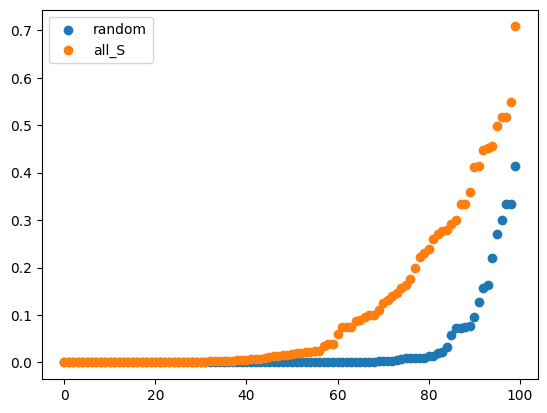

In [13]:
plt.scatter(range(N_ins), sorted(solution_dict['old']['Random']), label = 'random')
plt.scatter(range(N_ins), sorted(best_sorted), label = 'all_S')
plt.legend()

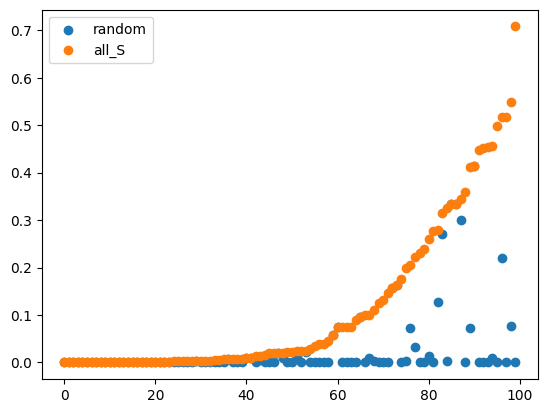

In [14]:
######################################################
#Try to sort adaptively using overlap with ITE - old style  CHEATING

keys = [] 
for i in range(N_ins):
    current_value = solution_dict['old']['Random'][i]
    new_key = 'Random'

    for Abs in [True, False]:
        for invert in [True, False]: 
            if solution_dict['old'][f'Sort_{Abs}_{invert}'][i] > current_value:
                current_value = solution_dict['old'][f'Sort_{Abs}_{invert}'][i]
                new_key = f'Sort_{Abs}_{invert}'
    keys.append(new_key)

best_sorted_cheat = [ solution_dict['old'].get(key)[i] for i,key in enumerate(keys) ]

# sorted_ind = np.argsort(solution_dict['old']['Random'])
sorted_ind = np.argsort(best_sorted_cheat)
plt.scatter(range(N_ins), np.array(solution_dict['old']['Random'])[sorted_ind], label = 'random')
plt.scatter(range(N_ins), np.array(best_sorted_cheat)[sorted_ind], label = 'all_S')
plt.legend()

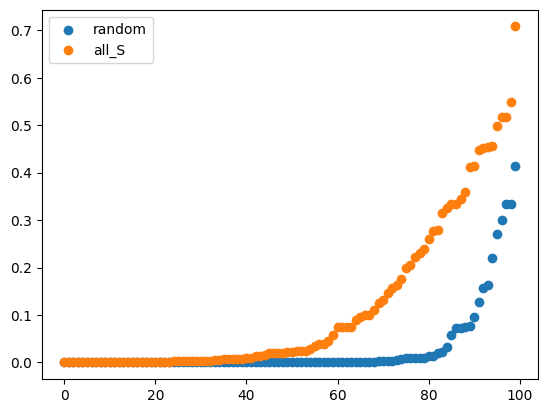

In [15]:
plt.scatter(range(N_ins), sorted(solution_dict['old']['Random']), label = 'random')
plt.scatter(range(N_ins), sorted(best_sorted_cheat), label = 'all_S')
plt.legend()

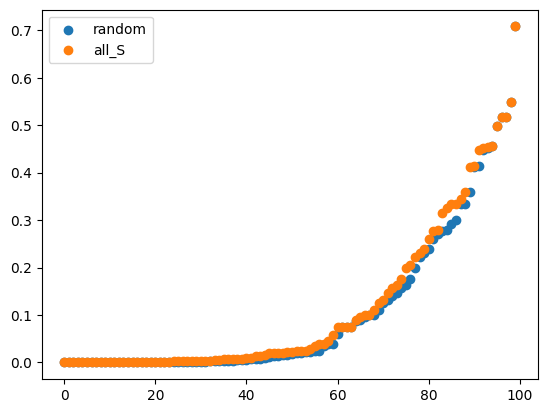

In [16]:
plt.scatter(range(N_ins), sorted(best_sorted), label = 'random')
plt.scatter(range(N_ins), sorted(best_sorted_cheat), label = 'all_S')
plt.legend()

In [17]:
solution_dict_all[0]['old']['Random'][0]

0.14627513657003996

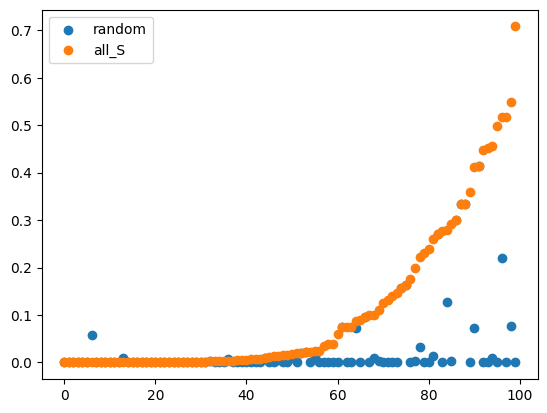

In [18]:
######################################################
#Try to sort adaptively using overlap with ITE - old style 

best_sorted_all = []

for j,num_variables in enumerate(num_variables_list):

    keys = [] 
    for i in range(N_ins):
        current_value = iteoverlap_dict_all[j]['old']['Random'][i]
        new_key = 'Random'

        for Abs in [True, False]:
            for invert in [True, False]: 
                if iteoverlap_dict_all[j]['old'][f'Sort_{Abs}_{invert}'][i] > current_value:
                    current_value = iteoverlap_dict_all[j]['old'][f'Sort_{Abs}_{invert}'][i]
                    new_key = f'Sort_{Abs}_{invert}'
        keys.append(new_key)

    best_sorted = [ solution_dict_all[j]['old'].get(key)[i] for i,key in enumerate(keys) ]

    best_sorted_all.append(best_sorted)

# sorted_ind = np.argsort(solution_dict['old']['Random'])
sorted_ind = np.argsort(best_sorted)
plt.scatter(range(N_ins), np.array(solution_dict['old']['Random'])[sorted_ind], label = 'random')
plt.scatter(range(N_ins), np.array(best_sorted)[sorted_ind], label = 'all_S')
plt.legend()

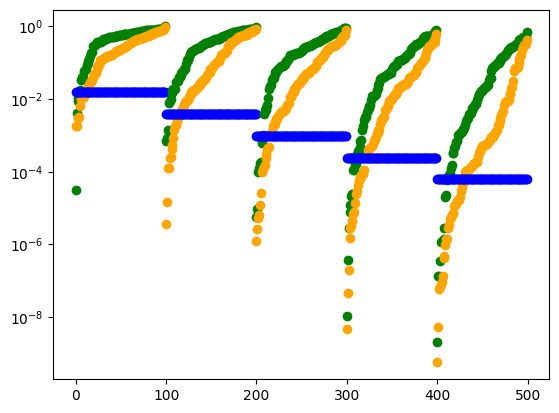

In [19]:
for j,num_variables in enumerate(num_variables_list):
    n_qubits = int(num_variables)

    x = np.arange(N_ins)
    y4 = [1/(2**float(num_variables)) for X in x]

    plt.scatter(x+50*(n_qubits-6), sorted(best_sorted_all[j]), label = 'sort', color='green')
    plt.scatter(x+50*(n_qubits-6), sorted(solution_dict_all[j]['old']['Random']), label = 'sort', color='orange')
    plt.scatter(x+50*(n_qubits-6), y4, label = 'random', color='blue')
    # plt.scatter(range(N_ins)+50*(float(num_variables)-6), sorted(best_sorted_cheat), label = 'all_S')
    plt.yscale('log')
    # plt.legend()


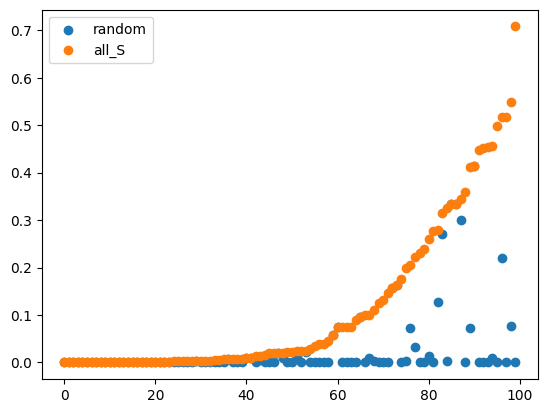

In [20]:
######################################################
#Try to sort adaptively CHEATING - old style 

best_sorted_all_cheat = []

for j,num_variables in enumerate(num_variables_list):

    keys = [] 
    for i in range(N_ins):
        current_value = solution_dict_all[j]['old']['Random'][i]
        new_key = 'Random'

        for Abs in [True, False]:
            for invert in [True, False]: 
                if solution_dict_all[j]['old'][f'Sort_{Abs}_{invert}'][i] > current_value:
                    current_value = solution_dict_all[j]['old'][f'Sort_{Abs}_{invert}'][i]
                    new_key = f'Sort_{Abs}_{invert}'
        keys.append(new_key)

    best_sorted_cheat = [ solution_dict_all[j]['old'].get(key)[i] for i,key in enumerate(keys) ]

    best_sorted_all_cheat.append(best_sorted_cheat)

# sorted_ind = np.argsort(solution_dict['old']['Random'])
sorted_ind = np.argsort(best_sorted_cheat)
plt.scatter(range(N_ins), np.array(solution_dict['old']['Random'])[sorted_ind], label = 'random')
plt.scatter(range(N_ins), np.array(best_sorted_cheat)[sorted_ind], label = 'all_S')
plt.legend()

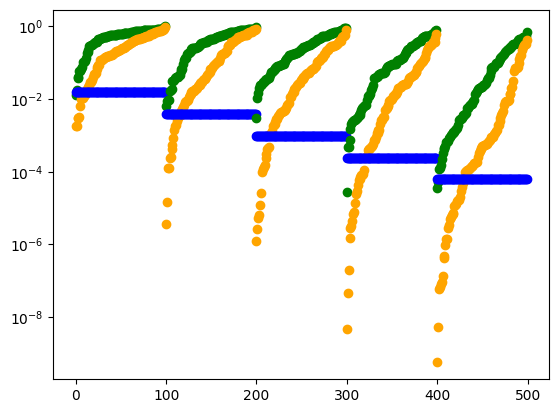

In [21]:
for j,num_variables in enumerate(num_variables_list):
    n_qubits = int(num_variables)

    x = np.arange(N_ins)
    y4 = [1/(2**float(num_variables)) for X in x]

    plt.scatter(x+50*(n_qubits-6), sorted(best_sorted_all_cheat[j]), label = 'sort', color='green')
    plt.scatter(x+50*(n_qubits-6), sorted(solution_dict_all[j]['old']['Random']), label = 'sort', color='orange')
    plt.scatter(x+50*(n_qubits-6), y4, label = 'random', color='blue')
    # plt.scatter(range(N_ins)+50*(float(num_variables)-6), sorted(best_sorted_cheat), label = 'all_S')
    plt.yscale('log')
    # plt.legend()

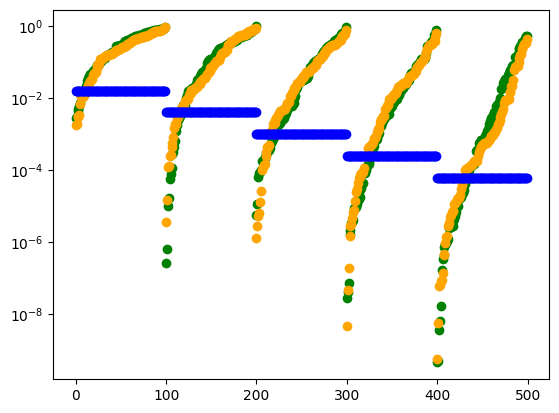

In [22]:
for j,num_variables in enumerate(num_variables_list):
    n_qubits = int(num_variables)

    x = np.arange(N_ins)
    y4 = [1/(2**float(num_variables)) for X in x]

    plt.scatter(x+50*(n_qubits-6), sorted(solution_dict_all[j]['old']['Sort_False_False']), label = 'sort', color='green')
    plt.scatter(x+50*(n_qubits-6), sorted(solution_dict_all[j]['old']['Random']), label = 'sort', color='orange')
    plt.scatter(x+50*(n_qubits-6), y4, label = 'random', color='blue')
    # plt.scatter(range(N_ins)+50*(float(num_variables)-6), sorted(best_sorted_cheat), label = 'all_S')
    plt.yscale('log')
    # plt.legend()

In [23]:
def compute_cvar(probabilities, values, alpha):
    """
    Auxilliary method to compute the conditional value at risk.

    Args:
        probabilities (List[Real]): The probabilities for measuring a bit string
        values (List[Real]): The corresponding energy values
        alpha (Real): Confidence level for the conditional value at risk

    Returns:
        cvar (Real): The conditional value at risk
    """
    
    sorted_indices = np.argsort(values)
    probs = np.array(probabilities)[sorted_indices]
    vals = np.array(values)[sorted_indices]

    cvar = 0
    total_prob = 0
    for i, (p, v) in enumerate(zip(probs, vals)):
        if p >= alpha - total_prob:
            p = alpha - total_prob
        total_prob += p
        cvar += p * v
        if abs(total_prob - alpha) < 1e-8:
            break

    cvar /= total_prob

    return cvar


In [24]:
num_variables_list = [str(num).zfill(3) for num in range(6,16, 2)]

N_ins = 100 ###100 50 number of random instances

ansatz_type = 'structure_like_qubo_YZ_2' 

layer = 1

shots = None

alpha = 0.01

tau =1.0

dir_0 = './data_sorting' + '/ansatz_type_{}/shots_{}'\
                        .format(ansatz_type,  shots)

cvar_dict_all = []

for num_variables in num_variables_list:

    # Initialize the dictionary using dictionary comprehension
    cvar_dict = {
    'old' : {f'Sort_{Abs}_{invert}': [] for Abs in [True, False] for invert in [True, False]},
    'lightcone' :  {f'Sort_{Abs}_{invert}': [] for Abs in [True, False] for invert in [True, False]} }

    cvar_dict['old']['Random'] = []
    cvar_dict['lightcone']['Random'] = []

    n_qubits = int(num_variables)

    pairs_all = list(itertools.chain.from_iterable(partition_N(n_qubits)))
    num_pairs = len(pairs_all)
    num_params = (n_qubits + 2*num_pairs) * layer

    for initialization in ['warm_start_measure']:   #'warm_start_measure_lightcone'

        print('initialization', initialization) 
        y = []

        dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}/initial_{}'\
                            .format(num_variables, num_params, layer, alpha, initialization)
        
        for r in range(N_ins):
                
            file_dir_name = dir_name + '/r_{}'\
                            .format(r)
            
            #ADD THE RANDOM OPTION
            if initialization ==  'warm_start_measure':
                file_path = file_dir_name + '/tau_{}_random.pkl'\
                                                    .format(tau)
                with open(file_path, 'rb') as f:
                    data = pickle.load(f)  

                probs = list(data['layers_exp_poss_dict']['l_1'].values())
                energies = list(data['layers_exp_poss_dict']['l_1'].keys())
                cvar = compute_cvar(probs, energies, alpha)

                cvar_dict['old']['Random'].append(cvar)

            # elif initialization == 'warm_start_measure_lightcone':   #MODIFY
            #     file_path_lightcone = file_dir_name + '/tau_{}_random.pkl'\
            #                                         .format(tau)
            #     with open(file_path_lightcone, 'rb') as f:
            #         data_lightcone = pickle.load(f)            
            #     fidelity = list(data_lightcone['exp_poss_dict'].items())[0][1]
            #     solution_dict['lightcone'][f'Sort_{Abs}_{invert}'].append(fidelity)
            #     overlap = data['ite_overlap']
            #     iteoverlap_dict['lightcone'][f'Sort_{Abs}_{invert}'].append(overlap)

            else:
                sys.stderr.write('something is wrong with initialization')
                sys.exit()

            #ADD ALL THE SORTING OPTIONS
            for Abs in [True, False]:
                for invert in [True, False]:

                    if initialization ==  'warm_start_measure':
                        file_path = file_dir_name + '/tau_{}_{}_{}.pkl'\
                                                    .format(tau, Abs, invert)
                        with open(file_path, 'rb') as f:
                            data = pickle.load(f)

                        probs = list(data['layers_exp_poss_dict']['l_1'].values())
                        energies = list(data['layers_exp_poss_dict']['l_1'].keys())
                        cvar = compute_cvar(probs, energies, alpha)

                        cvar_dict['old'][f'Sort_{Abs}_{invert}'].append(cvar)

                    # elif initialization == 'warm_start_measure_lightcone':   #MODIFY
                    #     file_path_lightcone = file_dir_name + '/tau_{}_{}_{}.pkl'\
                    #                                         .format(tau, Abs, invert)
                    #     with open(file_path_lightcone, 'rb') as f:
                    #         # Load the content of the file using pickle.load()
                    #         data_lightcone = pickle.load(f)            
                    #     fidelity = list(data_lightcone['exp_poss_dict'].items())[0][1]
                    #     solution_dict['lightcone'][f'Sort_{Abs}_{invert}'].append(fidelity)
                    #     overlap = data['ite_overlap']
                    #     iteoverlap_dict['lightcone'][f'Sort_{Abs}_{invert}'].append(overlap)

                    else:
                        sys.stderr.write('something is wrong with initialization')
                        sys.exit()

    cvar_dict_all.append(cvar_dict)

initialization warm_start_measure
initialization warm_start_measure
initialization warm_start_measure
initialization warm_start_measure
initialization warm_start_measure


In [25]:
print(cvar_dict_all[4]['old']['Random'])
print(cvar_dict_all[4]['old']['Sort_True_False'])

[-22.961265253043123, -21.194806306503196, -21.7952, -18.696332672903047, -17.7848, -17.645390484195755, -22.79565659961473, -18.481652337079666, -20.249859282787487, -17.686953556154794, -20.451400000000003, -18.94305995931409, -19.166300000000007, -19.763000000000005, -19.743867191405208, -24.62850000000001, -20.69019999999999, -16.281311003066378, -18.435381929085732, -22.759448809939755, -24.194000000000003, -21.98144338103492, -16.81201121152283, -22.914374064188337, -25.257615212284, -16.87280797978394, -21.197592896348386, -24.21212279236457, -19.094599999999993, -18.139, -21.926499999999994, -21.9831, -19.500369291686336, -19.58752277504477, -22.933037268065114, -18.304195688849337, -20.975521158353672, -19.62970594585394, -15.241815480160408, -19.298894782236843, -21.152157452189908, -20.243585153226967, -19.184485881528932, -18.996337252286736, -19.786827831632937, -19.193199999999997, -18.856421105206532, -17.71462874886417, -16.8076228553859, -17.46936023534062, -18.3132669

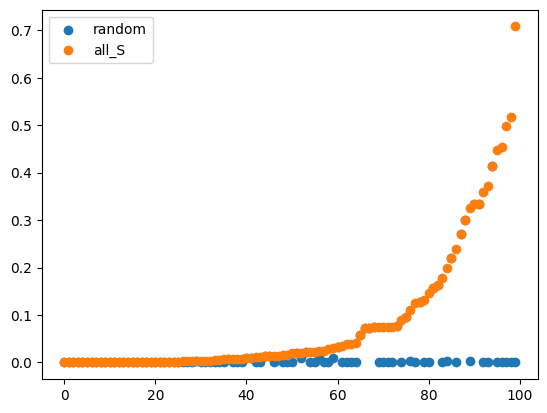

In [26]:
best_sorted_all_cvar = []
best_sorted_all_cvarfidelity = []

for j,num_variables in enumerate(num_variables_list):

    keys = [] 
    for i in range(N_ins):
        current_value = cvar_dict_all[j]['old']['Random'][i]
        new_key = 'Random'

        for Abs in [True, False]:
            for invert in [True, False]: 
                if cvar_dict_all[j]['old'][f'Sort_{Abs}_{invert}'][i] < current_value:
                    current_value = cvar_dict_all[j]['old'][f'Sort_{Abs}_{invert}'][i]
                    new_key = f'Sort_{Abs}_{invert}'
        keys.append(new_key)

    best_sorted_cvar = [ cvar_dict_all[j]['old'].get(key)[i] for i,key in enumerate(keys) ]
    best_sorted_cvarfidelity = [ solution_dict_all[j]['old'].get(key)[i] for i,key in enumerate(keys) ]

    best_sorted_all_cvar.append(best_sorted_cvar)
    best_sorted_all_cvarfidelity.append(best_sorted_cvarfidelity)

# sorted_ind = np.argsort(solution_dict['old']['Random'])
sorted_ind = np.argsort(best_sorted_cvar)
# plt.scatter(range(N_ins), np.array(cvar_dict['old']['Random'])[sorted_ind], label = 'random')
# plt.scatter(range(N_ins), np.array(best_sorted_cvar)[sorted_ind], label = 'all_S')
# plt.legend()

sorted_ind = np.argsort(best_sorted_cvarfidelity)
plt.scatter(range(N_ins), np.array(solution_dict['old']['Random'])[sorted_ind], label = 'random')
plt.scatter(range(N_ins), np.array(best_sorted_cvarfidelity)[sorted_ind], label = 'all_S')
plt.legend()

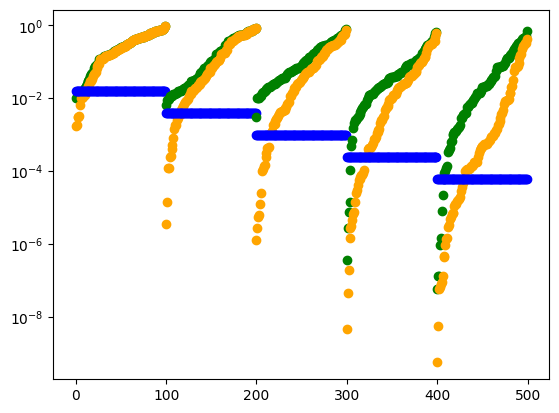

In [27]:
for j,num_variables in enumerate(num_variables_list):
    n_qubits = int(num_variables)

    x = np.arange(N_ins)
    y4 = [1/(2**float(num_variables)) for X in x]

    plt.scatter(x+50*(n_qubits-6), sorted(best_sorted_all_cvarfidelity[j]), label = 'sort', color='green')
    plt.scatter(x+50*(n_qubits-6), sorted(solution_dict_all[j]['old']['Random']), label = 'sort', color='orange')
    plt.scatter(x+50*(n_qubits-6), y4, label = 'random', color='blue')
    #plt.scatter(range(N_ins)+50*(float(num_variables)-6), sorted(best_sorted_cheat), label = 'all_S')
    plt.yscale('log')
    # plt.legend()

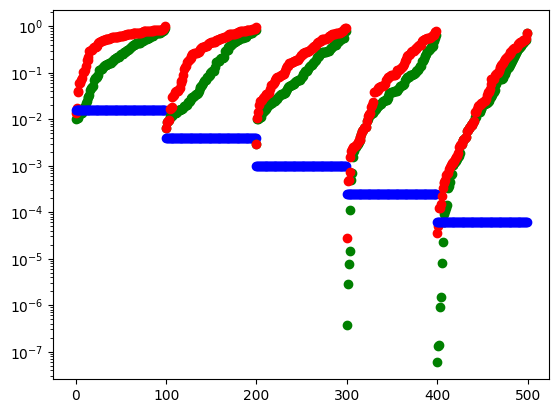

In [28]:
for j,num_variables in enumerate(num_variables_list):
    n_qubits = int(num_variables)

    x = np.arange(N_ins)
    y4 = [1/(2**float(num_variables)) for X in x]

    plt.scatter(x+50*(n_qubits-6), sorted(best_sorted_all_cvarfidelity[j]), label = 'sort', color='green')
    plt.scatter(x+50*(n_qubits-6), sorted(best_sorted_all_cheat[j]), label = 'sort', color='red')
    # plt.scatter(x+50*(n_qubits-6), sorted(solution_dict_all[j]['old']['Random']), label = 'sort', color='orange')
    plt.scatter(x+50*(n_qubits-6), y4, label = 'random', color='blue')
    #plt.scatter(range(N_ins)+50*(float(num_variables)-6), sorted(best_sorted_cheat), label = 'all_S')
    plt.yscale('log')
    # plt.legend()